In [4]:
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('df2.csv',sep=',',skipinitialspace=True)
df = df.drop('Unnamed: 0', axis=1)
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,82.278624,183.885162,92.275930,2.403477,9.809035,2.266846,80.177693,6.487169,27.682076
std,7.441333,12.622858,25.801031,1.170426,6.918614,1.801044,7.840508,2.708622,8.711789
min,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,57.000000,0.700000,11.300000
25%,77.600000,175.000000,71.475000,1.500000,3.375000,0.600000,75.000000,4.400000,20.900000
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,79.700000,6.300000,26.500000
75%,86.700000,193.000000,110.825000,3.200000,15.900000,4.000000,85.200000,8.400000,33.200000
max,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,105.100000,13.800000,65.900000


In [6]:
df2 = df.copy()
#df2['bmi']=df2['mass']/((df2['length']/100)**2)

In [7]:
df4 = df2.copy()
Q1 = df4.quantile(0.25)
Q3 = df4.quantile(0.75)
IQR = Q3 - Q1
df4 = df4[~((df4 < (Q1 - 1.5 * IQR)) |(df4 > (Q3 + 1.5 * IQR))).any(axis=1)]
df4.head()
print(df2.mean()-df4.mean())
df5 = df4.copy()
df6 = df4.copy()
df7 = df4.copy()

genetic     0.239801
length     -0.160350
mass        0.567130
exercise   -0.000772
smoking     0.028397
alcohol    -0.002930
lifespan    0.189335
sugar       0.002709
BMI         0.262640
dtype: float64


In [49]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

In [50]:
#choose dataframe
mydf = df4
# mean = mydf.mean()
# mydf = mydf.clip(lower=mean - 1.5 * IQR, upper=mean + 1.5 * IQR, axis=1)

In [51]:
train, test = train_test_split(mydf, test_size=0.2, random_state=42)
X = train.drop(columns=['lifespan'])
y = train.lifespan

The coefficient of determination $R^2$ is defined as $$(1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}})$$<br>
the error variance of the prediciton
&emsp;&emsp;&emsp;  $$SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}$$<br>
the variance inherent in the data
&emsp;&emsp;&emsp;  $$SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}$$<br>
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $(R^2)$ score of 0.0.



The accuracy metric in sklearn linear regression is the $(R^2)$  metric. It essentially tells you the percent of the variation in the dependent variable explained by the model predictors. The term "accuracy" itself is reserved for classification problems only, and it is not used in regression ones. Regarding performance metrics, in predictive tasks practically metrics like MSE, RMSE, and MAE are always preferred over $(R^2)$ <br>


In [52]:
regr = linear_model.LinearRegression()
regr.fit(X, y) 

score = regr.score(test.drop(columns=['lifespan']),test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) vanilla:', score)

coefficient of determination(R²) vanilla: 0.9820618333051058


Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are

In [53]:
from sklearn.metrics import mean_squared_error
p_test = regr.predict(test.drop(columns=['lifespan']))

mse = mean_squared_error(test.lifespan, p_test)
import math
rmse = (math.sqrt(mse))
print('Root Mean Squared Error:',rmse)

Root Mean Squared Error: 1.0252111961960162


In [54]:
print(regr.coef_)

[ 1.00015127 -0.03859626  0.0391634   0.80577173 -0.26347791 -0.21462316
 -0.07070465 -0.19313771]


In [55]:
df.columns

Index(['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol',
       'lifespan', 'sugar', 'BMI'],
      dtype='object')

In [56]:

# The coefficients
print('Coefficients: \n', regr.coef_)
print(f'c would be:',regr.predict([[0]*len(regr.coef_)]))

Coefficients: 
 [ 1.00015127 -0.03859626  0.0391634   0.80577173 -0.26347791 -0.21462316
 -0.07070465 -0.19313771]
c would be: [8.33324562]


d:\0_Program_Files\Python3.10.1\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


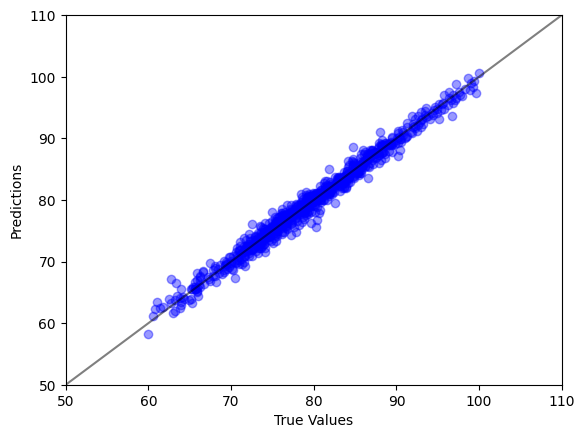

In [57]:
p_test = regr.predict(test.drop(columns=['lifespan']))

plt.scatter(test['lifespan'],p_test,c='blue', alpha=0.4)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# plot diagonal line for comparison (prediction is exact)
lims=[50,110]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims,c='black',alpha=0.5)
plt.show()

<h3> Feature distribution analysis </h3>


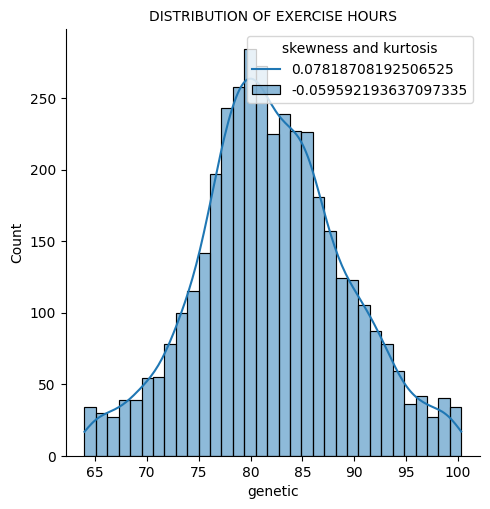

In [9]:
import seaborn as sns

sns.displot(df4["genetic"],kde=True)
plt.title("DISTRIBUTION OF EXERCISE HOURS",fontsize=10)
skewness=str(df4["genetic"].skew())
kurtosis=str(df4["genetic"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

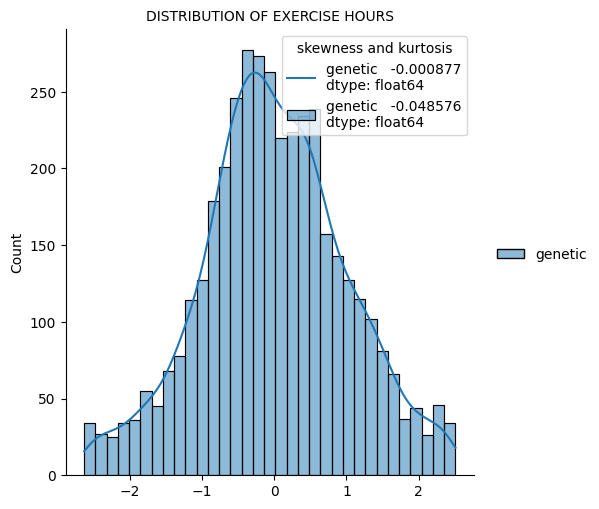

In [10]:
from sklearn.preprocessing import PowerTransformer

bc = PowerTransformer(method="box-cox")
mydata = df4['genetic'].values
data = mydata.reshape((len(mydata),1))
data_trans = bc.fit_transform(data)

df_data_trans = pd.DataFrame(data_trans, columns = ['genetic'])
df_data_trans.head()
# histogram of the transformed data
# plt.hist(data_trans, bins=25)
# plt.show()

sns.displot(df_data_trans,kde=True)
plt.title("DISTRIBUTION OF EXERCISE HOURS",fontsize=10)
skewness=str(df_data_trans.skew())
kurtosis=str(df_data_trans.kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

In [11]:
df_genetic = df4.drop(['genetic'], axis=1).copy()

from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df4['exercise'],alpha=0.05)
df_genetic['exercise'] = y_bc  

In [14]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

mydf = df_genetic

train, test = train_test_split(mydf, test_size=0.2, random_state=42)
X = train.drop(columns=['lifespan'])
y = train.lifespan

regr = linear_model.LinearRegression()
regr.fit(X, y) 

score = regr.score(test.drop(columns=['lifespan']),test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) feature normalised exercise:', score)


p_test = regr.predict(test.drop(columns=['lifespan']))

mse = mean_squared_error(test.lifespan, p_test)
import math
rmse = (math.sqrt(mse))
print('Root Mean Squared Error:',rmse)

coefficient of determination(R²) feature normalised exercise: 0.09414610004156254
Root Mean Squared Error: 7.285399840194451


decreased $R^2$ but massive increase in RMSE 7 years is alot of variation; ❌

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  5.36it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,4.105909,405.380916,-28164.477450,inf,0.043653,3.359621e-07
pearson3,4.105911,405.380040,-28164.475869,inf,0.043656,3.352120e-07
f,4.105933,407.386234,-28156.139225,inf,0.043683,3.288031e-07
lognorm,4.113221,407.096922,-28157.211121,inf,0.047442,1.992839e-08
norm,4.299821,408.128409,-27984.331385,inf,0.082466,1.311073e-24


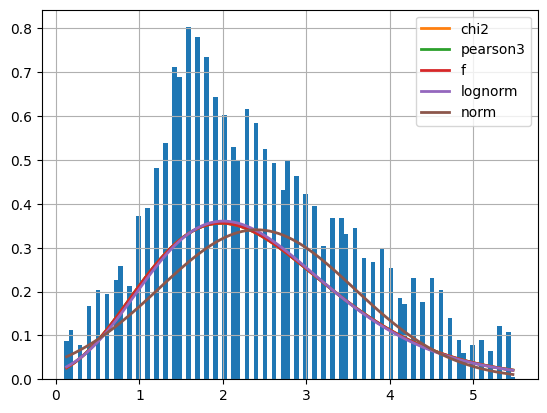

In [58]:
import numpy as np
from fitter import Fitter

feature = np.array(df['exercise'])
f = Fitter(feature, distributions=['norm','uniform','t','pearson3','loguniform', 'lognorm','chi2', 'f'])
f.fit()
f.summary()

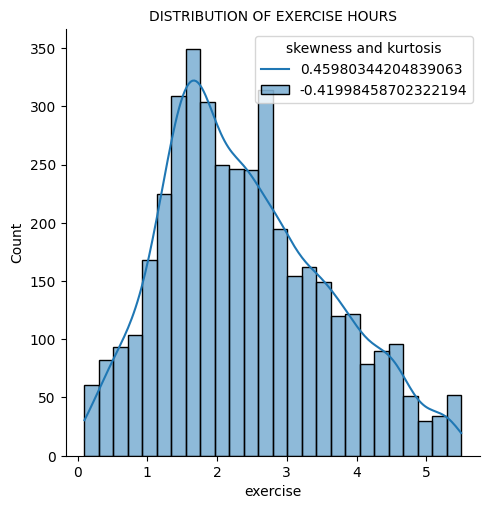

In [59]:
import seaborn as sns

sns.displot(df["exercise"],kde=True)
plt.title("DISTRIBUTION OF EXERCISE HOURS",fontsize=10)
skewness=str(df["exercise"].skew())
kurtosis=str(df["exercise"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

Apply a power transform featurewise to make data more Gaussian-like. (A power transformation in general is used to stabilize variance and make a distribution more normal.)<br>
Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.
Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

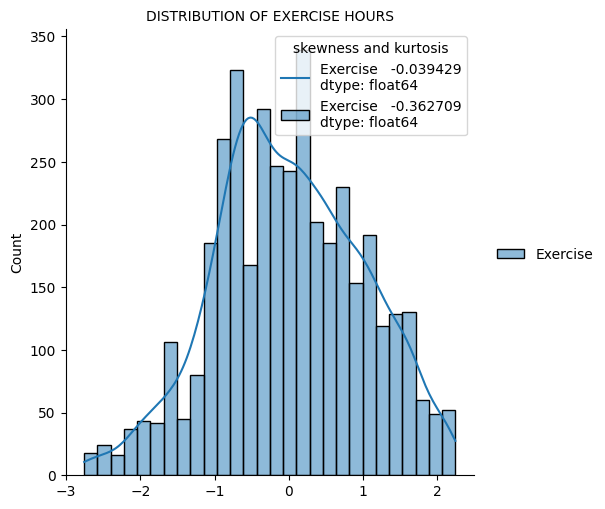

In [60]:
from sklearn.preprocessing import PowerTransformer

bc = PowerTransformer(method="box-cox")
mydata = df4['exercise'].values
data = mydata.reshape((len(mydata),1))
data_trans = bc.fit_transform(data)

df_data_trans = pd.DataFrame(data_trans, columns = ['Exercise'])
df_data_trans.head()
# histogram of the transformed data
# plt.hist(data_trans, bins=25)
# plt.show()

sns.displot(df_data_trans,kde=True)
plt.title("DISTRIBUTION OF EXERCISE HOURS",fontsize=10)
skewness=str(df_data_trans.skew())
kurtosis=str(df_data_trans.kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

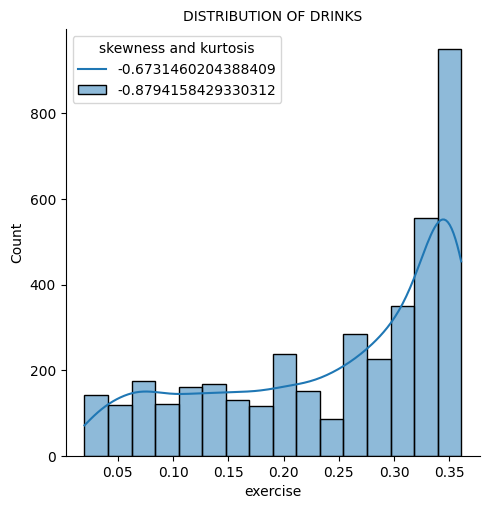

In [12]:
# fit lognormal distribution
from scipy import stats
import seaborn as sns

data = df4['exercise'].values

shape, loc, scale = stats.lognorm.fit(data, loc=0)
pdf_lognorm = stats.lognorm.pdf(df4["exercise"], shape, loc, scale)

df_data_trans_exercise = pd.DataFrame(pdf_lognorm, columns = ['exercise'])
df_data_trans_exercise.head()

sns.displot(df_data_trans_exercise["exercise"],kde=True)
plt.title("DISTRIBUTION OF DRINKS",fontsize=10)
skewness=str(df_data_trans_exercise["exercise"].skew())
kurtosis=str(df_data_trans_exercise["exercise"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()




In [62]:
df4.head()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9,29.1
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2,35.6
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5,36.0
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9,41.4
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5,22.6


In [63]:
df4.drop(['exercise'], axis=1)
df4.head()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9,29.1
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2,35.6
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5,36.0
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9,41.4
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5,22.6


In [64]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df4['exercise'],alpha=0.05)
df4['exercise'] = y_bc  
#df4['exercise'] = np.log(df4['exercise'])



df4.head()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
0,73.9,185.0,99.7,-0.102133,0.0,2.4,73.1,6.9,29.1
1,86.0,172.0,105.4,0.703407,8.1,0.4,85.0,4.2,35.6
2,83.3,176.0,111.4,0.098059,0.8,4.6,81.6,7.5,36.0
3,82.8,164.0,111.4,2.537189,11.8,1.0,81.0,2.9,41.4
4,78.7,178.0,71.6,0.458437,8.3,4.9,75.0,5.5,22.6


In [65]:
mydf = df4

train, test = train_test_split(mydf, test_size=0.2, random_state=42)
X = train.drop(columns=['lifespan'])
y = train.lifespan

regr = linear_model.LinearRegression()
regr.fit(X, y) 

score = regr.score(test.drop(columns=['lifespan']),test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) feature normalised exercise:', score)


p_test = regr.predict(test.drop(columns=['lifespan']))

mse = mean_squared_error(test.lifespan, p_test)
import math
rmse = (math.sqrt(mse))
print('Root Mean Squared Error:',rmse)

coefficient of determination(R²) feature normalised exercise: 0.982032685797475
Root Mean Squared Error: 1.026043784683393


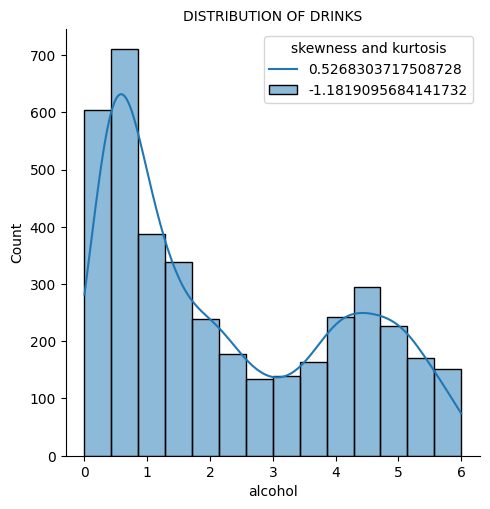

In [66]:

sns.displot(df5["alcohol"],kde=True)
plt.title("DISTRIBUTION OF DRINKS",fontsize=10)
skewness=str(df5["alcohol"].skew())
kurtosis=str(df5["alcohol"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

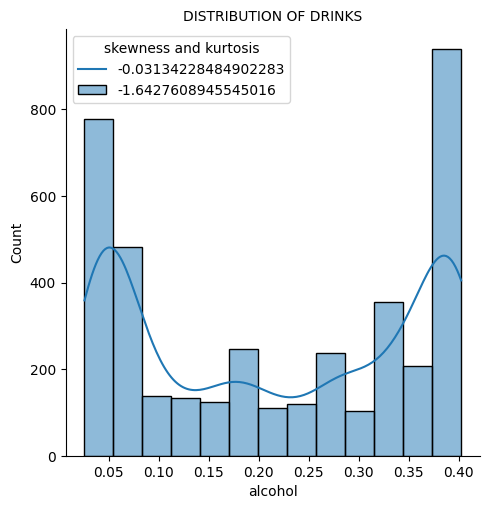

In [67]:
# fit lognormal distribution
from scipy import stats
shape, loc, scale = stats.lognorm.fit(df5["alcohol"], loc=0)
pdf_lognorm = stats.lognorm.pdf(df5["alcohol"], shape, loc, scale)

df_data_trans_alcohol = pd.DataFrame(pdf_lognorm, columns = ['alcohol'])
df_data_trans_alcohol.head()

sns.displot(df_data_trans_alcohol["alcohol"],kde=True)
plt.title("DISTRIBUTION OF DRINKS",fontsize=10)
skewness=str(df_data_trans_alcohol["alcohol"].skew())
kurtosis=str(df_data_trans_alcohol["alcohol"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

In [68]:
df5['alcohol']=df_data_trans_alcohol
df5.head()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
0,73.9,185.0,99.7,0.9,0.0,0.153717,73.1,6.9,29.1
1,86.0,172.0,105.4,1.8,8.1,0.382197,85.0,4.2,35.6
2,83.3,176.0,111.4,1.1,0.8,0.047996,81.6,7.5,36.0
3,82.8,164.0,111.4,4.7,11.8,0.353181,81.0,2.9,41.4
4,78.7,178.0,71.6,1.5,8.3,0.041781,75.0,5.5,22.6


In [69]:
mydf = df5

train, test = train_test_split(mydf, test_size=0.2, random_state=42)
X = train.drop(columns=['lifespan'])
y = train.lifespan

regr = linear_model.LinearRegression()
regr.fit(X, y) 

score = regr.score(test.drop(columns=['lifespan']),test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) feature normalised alcohol:', score)


p_test = regr.predict(test.drop(columns=['lifespan']))

mse = mean_squared_error(test.lifespan, p_test)
import math
rmse = (math.sqrt(mse))
print('Root Mean Squared Error:',rmse)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

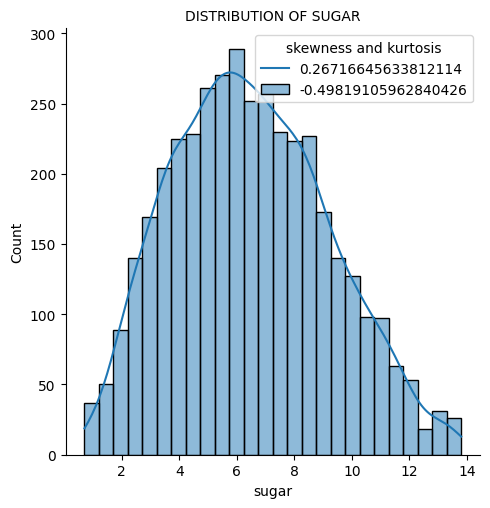

In [ ]:

sns.displot(df6["sugar"],kde=True)
plt.title("DISTRIBUTION OF SUGAR",fontsize=10)
skewness=str(df6["sugar"].skew())
kurtosis=str(df6["sugar"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,3.952764,29.1
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,2.411763,35.6
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,4.265692,36.0
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,1.553647,41.4
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,3.185065,22.6


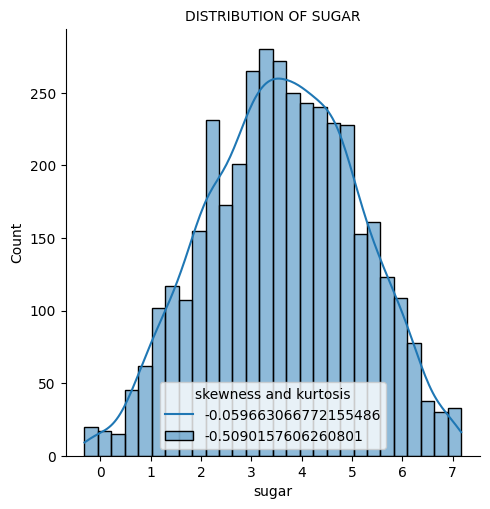

In [ ]:
y_bc,lam, ci= boxcox(df6['sugar'],alpha=0.05)
df6['sugar'] = y_bc  
display(df6.head())

sns.displot(df6["sugar"],kde=True)
plt.title("DISTRIBUTION OF SUGAR",fontsize=10)
skewness=str(df6["sugar"].skew())
kurtosis=str(df6["sugar"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show()

In [ ]:
mydf = df6

train, test = train_test_split(mydf, test_size=0.2, random_state=42)
X = train.drop(columns=['lifespan'])
y = train.lifespan

regr = linear_model.LinearRegression()
regr.fit(X, y) 

score = regr.score(test.drop(columns=['lifespan']),test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) feature normalised sugar:', score)


p_test = regr.predict(test.drop(columns=['lifespan']))

mse = mean_squared_error(test.lifespan, p_test)
import math
rmse = (math.sqrt(mse))
print('Root Mean Squared Error:',rmse)

coefficient of determination(R²) feature normalised sugar: 0.9820587689042162
Root Mean Squared Error: 1.025298761552976


In [ ]:
df7.head()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9,29.1
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2,35.6
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5,36.0
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9,41.4
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5,22.6


In [ ]:
df7['exercise']=df4['exercise']
df7['alcohol']=df5['alcohol']
df7['sugar']=df6['sugar']
df7.head()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
0,73.9,185.0,99.7,-0.102133,0.0,0.370113,73.1,3.952764,29.1
1,86.0,172.0,105.4,0.703407,8.1,0.221145,85.0,2.411763,35.6
2,83.3,176.0,111.4,0.098059,0.8,0.335365,81.6,4.265692,36.0
3,82.8,164.0,111.4,2.537189,11.8,0.045807,81.0,1.553647,41.4
4,78.7,178.0,71.6,0.458437,8.3,0.265798,75.0,3.185065,22.6


In [ ]:
mydf = df7

train, test = train_test_split(mydf, test_size=0.2, random_state=42)
X = train.drop(columns=['lifespan'])
y = train.lifespan

regr = linear_model.LinearRegression()
regr.fit(X, y) 

score = regr.score(test.drop(columns=['lifespan']),test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) feature normalised sugar:', score)


p_test = regr.predict(test.drop(columns=['lifespan']))

mse = mean_squared_error(test.lifespan, p_test)
import math
rmse = (math.sqrt(mse))
print('Root Mean Squared Error:',rmse)

coefficient of determination(R²) feature normalised sugar: 0.9790602453220286
Root Mean Squared Error: 1.1076692701697501
